# Main Notebook: Full Spec End-to-End

このノートは `src/` の関数を呼び出して、
データ取得 → 全strategy計算 → 全比較 → attribution → dashboard → 結論 を1本で実行する。

※ プロジェクト規約により、安定ロジックは `src/` に保持し、成果物は `outputs/` に保存する。


In [1]:
from __future__ import annotations

import os
import sys
from pathlib import Path

import pandas as pd

try:
    from IPython.display import Image, display
except Exception:  # noqa: BLE001
    Image = None
    def display(x):
        print(x)

def _find_project_root(start: Path) -> Path:
    for candidate in [start, *start.parents]:
        if (candidate / "src" / "thematic_strategy").exists():
            return candidate
    raise FileNotFoundError("Project root not found: src/thematic_strategy が見つかりません")

ROOT = _find_project_root(Path.cwd()).resolve()
(ROOT / "outputs" / "logs" / "matplotlib").mkdir(parents=True, exist_ok=True)
os.environ.setdefault("MPLCONFIGDIR", str(ROOT / "outputs" / "logs" / "matplotlib"))

SRC = ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

from thematic_strategy import (
    DEFAULT_BASE_PARAMS,
    DEFAULT_REPRESENTATIVE_IDS,
    FULL_SPEC_RECOMMENDED_ID,
    run_full_spec_pipeline,
)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 240)


In [7]:
BASE_PARAMS = dict(DEFAULT_BASE_PARAMS)
BASE_PARAMS["split_date"] = "2023-01-01"

result = run_full_spec_pipeline(
    base_params=BASE_PARAMS,
    include_optional_t3_on_t2=True,
    reuse_nav_if_exists=True,
    representative_ids=list(DEFAULT_REPRESENTATIVE_IDS),
    recommended_strategy_id=FULL_SPEC_RECOMMENDED_ID,
)

print("best_strategy_id:", result["best_strategy_id"])
print("recommended_strategy_id:", result["recommended_strategy_id"])
print("recommended_is_best:", result["conclusion"]["recommended_is_best"])


/Users/kencharoff/workspace/envs/base/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/kencharoff/workspace/envs/base/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1020: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kencharoff/workspace/envs/base/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/kencharoff/workspace/envs/base/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1020: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kencharoff/workspace/envs/base/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Us

best_strategy_id: T1_best_onoff_statepred_M12_eta0p2
recommended_strategy_id: T1_best_onoff_statepred_M12_eta0p2
recommended_is_best: True


In [8]:
summary_all = result["summary_all"].copy()
summary_period = result["summary_period"].copy()
best_sid = result["best_strategy_id"]

print("=== nav_summary_with_onoff_stepB (上位10) ===")
display(summary_all.head(10))

print("=== best strategy Train/Test/All metrics ===")
display(summary_period[summary_period["strategy_id"] == best_sid])

compare_ids = ["EQW", "T1_base_best", "T1_best_onoff_statepred_M12_eta0p2"]
compare_table = summary_all[summary_all["strategy_id"].isin(compare_ids)].copy()
compare_table = compare_table[["strategy_id", "TrainSharpe", "TestSharpe", "Sharpe", "MDD", "AvgTurnover", "TotalCost"]]
print("=== Full Spec 比較（EQW / T1_base_best / 推奨）===")
display(compare_table.sort_values("TestSharpe", ascending=False))


=== nav_summary_with_onoff_stepB (上位10) ===


strategy_id strategy_mode t1_variant t2_variant      t3_variant factor_set rebalance  top_k  exec_lag  split_date  onoff_enabled onoff_method  onoff_eta  onoff_M      CAGR       Vol    Sharpe       MDD  \
10  T1_best_onoff_statepred_M12_eta0p2            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.2     12.0  0.103521  0.185197  0.625313 -0.471470   
11  T1_best_onoff_statepred_M12_eta0p5            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.5     12.0  0.121876  0.196252  0.684938 -0.474548   
9     T1_best_onoff_statepred_M12_eta0            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.0     12.0  0.089467  0.182913  0.560725 -0.472335   
1                               T1_mom            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01          False                     NaN      NaN  0.148501  0.231526  0.714583 -0.484758   
2                         T1_base_best            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01          False                     NaN      NaN  0.148501  0.231526  0.714583 -0.484758   
8    T1_best_onoff_statepred_M6_eta0p5            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.5      6.0  0.122898  0.178459  0.739031 -0.460831   
5            T1_base_best_onoff_eta0p5            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   lagged_sed        0.5      6.0  0.125678  0.201471  0.689119 -0.427853   
7    T1_best_onoff_statepred_M6_eta0p2            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.2      6.0  0.103893  0.160513  0.696223 -0.465790   
4            T1_base_best_onoff_eta0p2            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   lagged_sed        0.2      6.0  0.109876  0.192235  0.639183 -0.405655   
6      T1_best_onoff_statepred_M6_eta0            T1   baseline   baseline  additive_on_t2  minimal_3         M      4         1  2023-01-01           True   state_pred        0.0      6.0  0.090203  0.157136  0.628316 -0.473916   

    AvgTurnover  TotalTradingCost  TotalExpenseCost  TotalCost  FinalNAV  TrainSharpe  TestSharpe  TrainMDD   TestMDD  All_CAGR  All_Sharpe   All_Vol   All_MDD  Train_CAGR  Train_Sharpe  Train_Vol  Train_MDD  Test_CAGR  Test_Sharpe  \
10     0.091105          0.161920          0.031411   0.193331  2.973726     0.305839    1.470326 -0.471470 -0.197730  0.103521    0.625313  0.185197 -0.471470    0.040172      0.305839   0.185916  -0.471470   0.425929     1.470326   
11     0.091105          0.205975          0.041070   0.247045  3.569144     0.408158    1.437699 -0.474548 -0.197730  0.121876    0.684938  0.196252 -0.474548    0.063024      0.408158   0.198489  -0.474548   0.513229     1.437699   
9      0.055057          0.146850          0.024982   0.171832  2.580594     0.229514    1.436216 -0.472335 -0.197730  0.089467    0.560725  0.182913 -0.472335    0.025413      0.229514   0.183586  -0.472335   0.361596     1.436216   
1      0.091105          0.279400          0.057170   0.336570  4.626600     0.509413    1.312912 -0.484758 -0.197730  0.148501    0.714583  0.231526 -0.484758    0.097149      0.509413   0.238063  -0.484758   0.646633     1.312912   
2      0.091105          0.279400          0.057170   0.336570  4.626600     0.509413    1.312912 -0.484758 -0.197730  0.148501    0.714583  0.231526 -0.484758    0.097149      0.509413   0.238063  -0.484758   0.646633     1.312912   
8      0.091105          0.199925          0.041415   0.241340  

=== best strategy Train/Test/All metrics ===


strategy_id period      CAGR    Sharpe       Vol      MDD  AvgTurnover  TotalTradingCost  TotalExpenseCost  FinalNAV  onoff_enabled onoff_method  onoff_eta  onoff_M
30  T1_best_onoff_statepred_M12_eta0p2    All  0.103521  0.625313  0.185197 -0.47147     0.091105           0.16192          0.031411  2.973726           True   state_pred        0.2     12.0
32  T1_best_onoff_statepred_M12_eta0p2   Test  0.425929  1.470326  0.183080 -0.19773     0.101421           0.06919          0.012523  2.973726           True   state_pred        0.2     12.0
31  T1_best_onoff_statepred_M12_eta0p2  Train  0.040172  0.305839  0.185916 -0.47147     0.087140           0.09273          0.018888  1.369950           True   state_pred        0.2     12.0

=== Full Spec 比較（EQW / T1_base_best / 推奨）===


strategy_id  TrainSharpe  TestSharpe    Sharpe       MDD  AvgTurnover  TotalCost
10  T1_best_onoff_statepred_M12_eta0p2     0.305839    1.470326  0.625313 -0.471470     0.091105   0.193331
2                         T1_base_best     0.509413    1.312912  0.714583 -0.484758     0.091105   0.336570
0                                  EQW     0.505901    0.909975  0.607555 -0.382216     0.000916   0.066339

In [9]:
print("=== attribution snapshots ===")
display(result["attribution_betas"].head())
display(result["attribution_contrib"].head())
display(result["attribution_internal"].head())
display(result["attribution_overlay"].head())


=== attribution snapshots ===


date strategy_id factor_name      beta
0 2018-02-28         EQW         EQW  0.999818
1 2018-02-28         EQW         IEF -0.000768
2 2018-03-31         EQW         EQW  0.999705
3 2018-03-31         EQW         IEF -0.000777
4 2018-04-30         EQW         EQW  0.999696

date strategy_id factor_name   contrib
0 2018-02-28         EQW         EQW -0.030058
1 2018-02-28         EQW         IEF  0.000007
2 2018-03-31         EQW         EQW -0.011081
3 2018-03-31         EQW         IEF -0.000009
4 2018-04-30         EQW         EQW -0.008909

date strategy_id     R_sel    R_port  R_wgt
0 2015-01-31         EQW -0.002603 -0.002603    0.0
1 2015-02-28         EQW  0.078360  0.078360    0.0
2 2015-03-31         EQW  0.006712  0.006712    0.0
3 2015-04-30         EQW  0.026100  0.026100    0.0
4 2015-05-31         EQW  0.009224  0.009224    0.0

date      managed_strategy_id base_strategy_id  overlay_excess  indicator  eta  M method
0 2015-01-31  T1_base_best_onoff_eta0     T1_base_best             0.0        0.0  0.0  6  stepA
1 2015-02-28  T1_base_best_onoff_eta0     T1_base_best             0.0        0.0  0.0  6  stepA
2 2015-03-31  T1_base_best_onoff_eta0     T1_base_best             0.0        0.0  0.0  6  stepA
3 2015-04-30  T1_base_best_onoff_eta0     T1_base_best             0.0        0.0  0.0  6  stepA
4 2015-05-31  T1_base_best_onoff_eta0     T1_base_best             0.0        1.0  0.0  6  stepA

=== generated outputs (saved in outputs/) ===
outputs/figures/nav_all_strategies_ALL.png


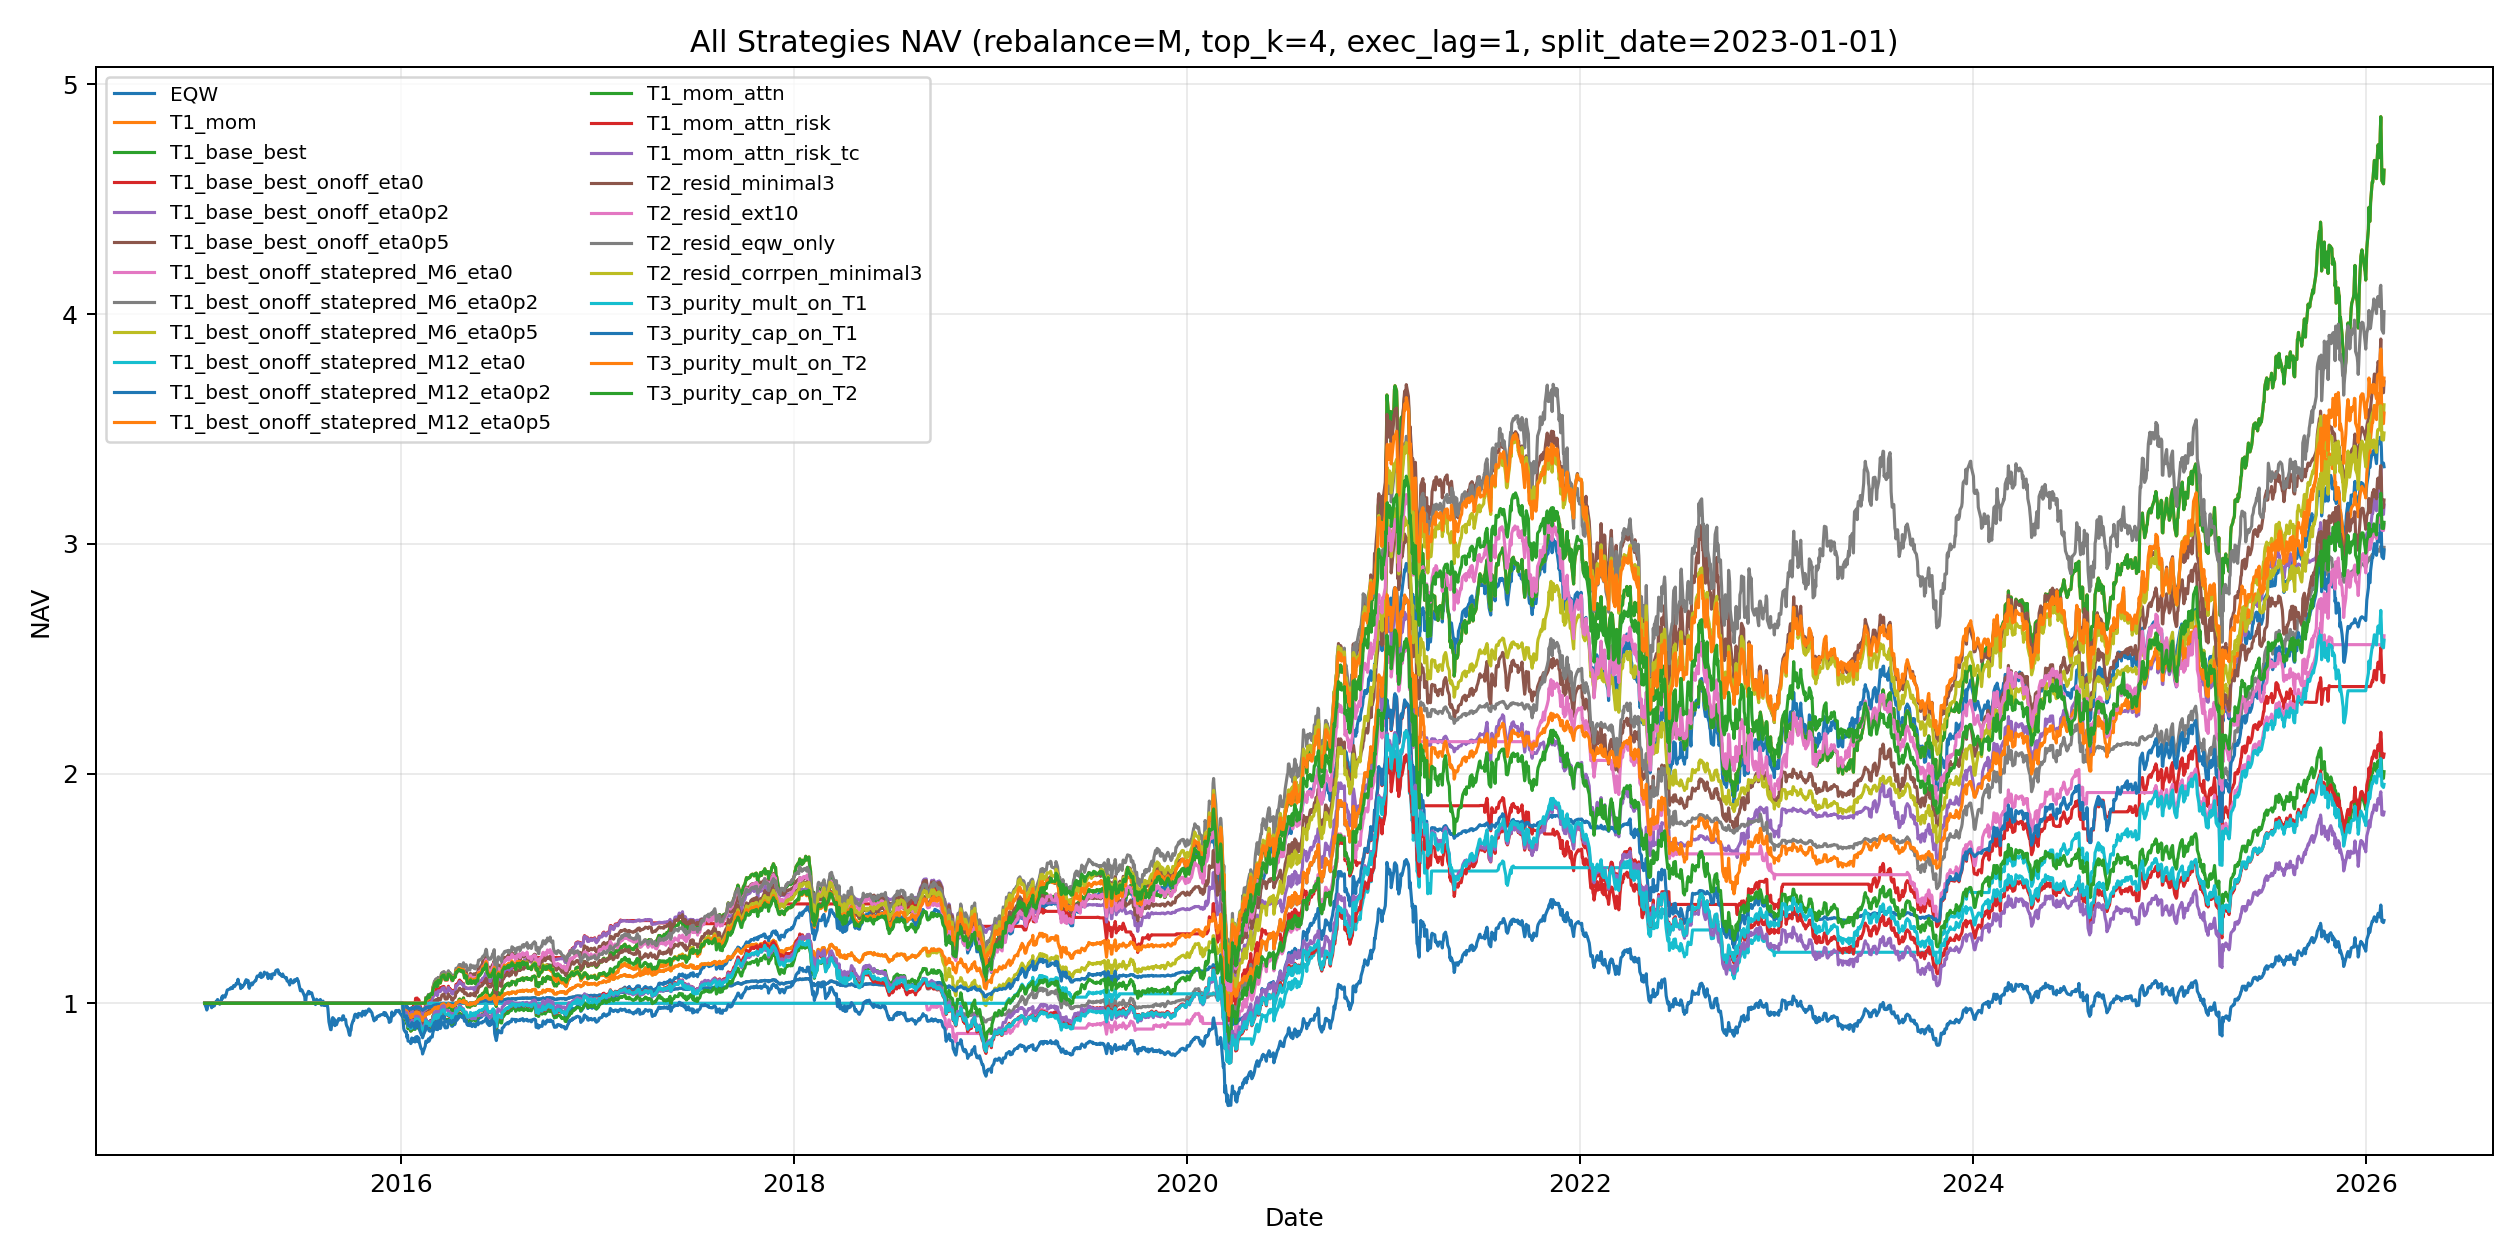

outputs/figures/nav_all_strategies_ALL_log.png


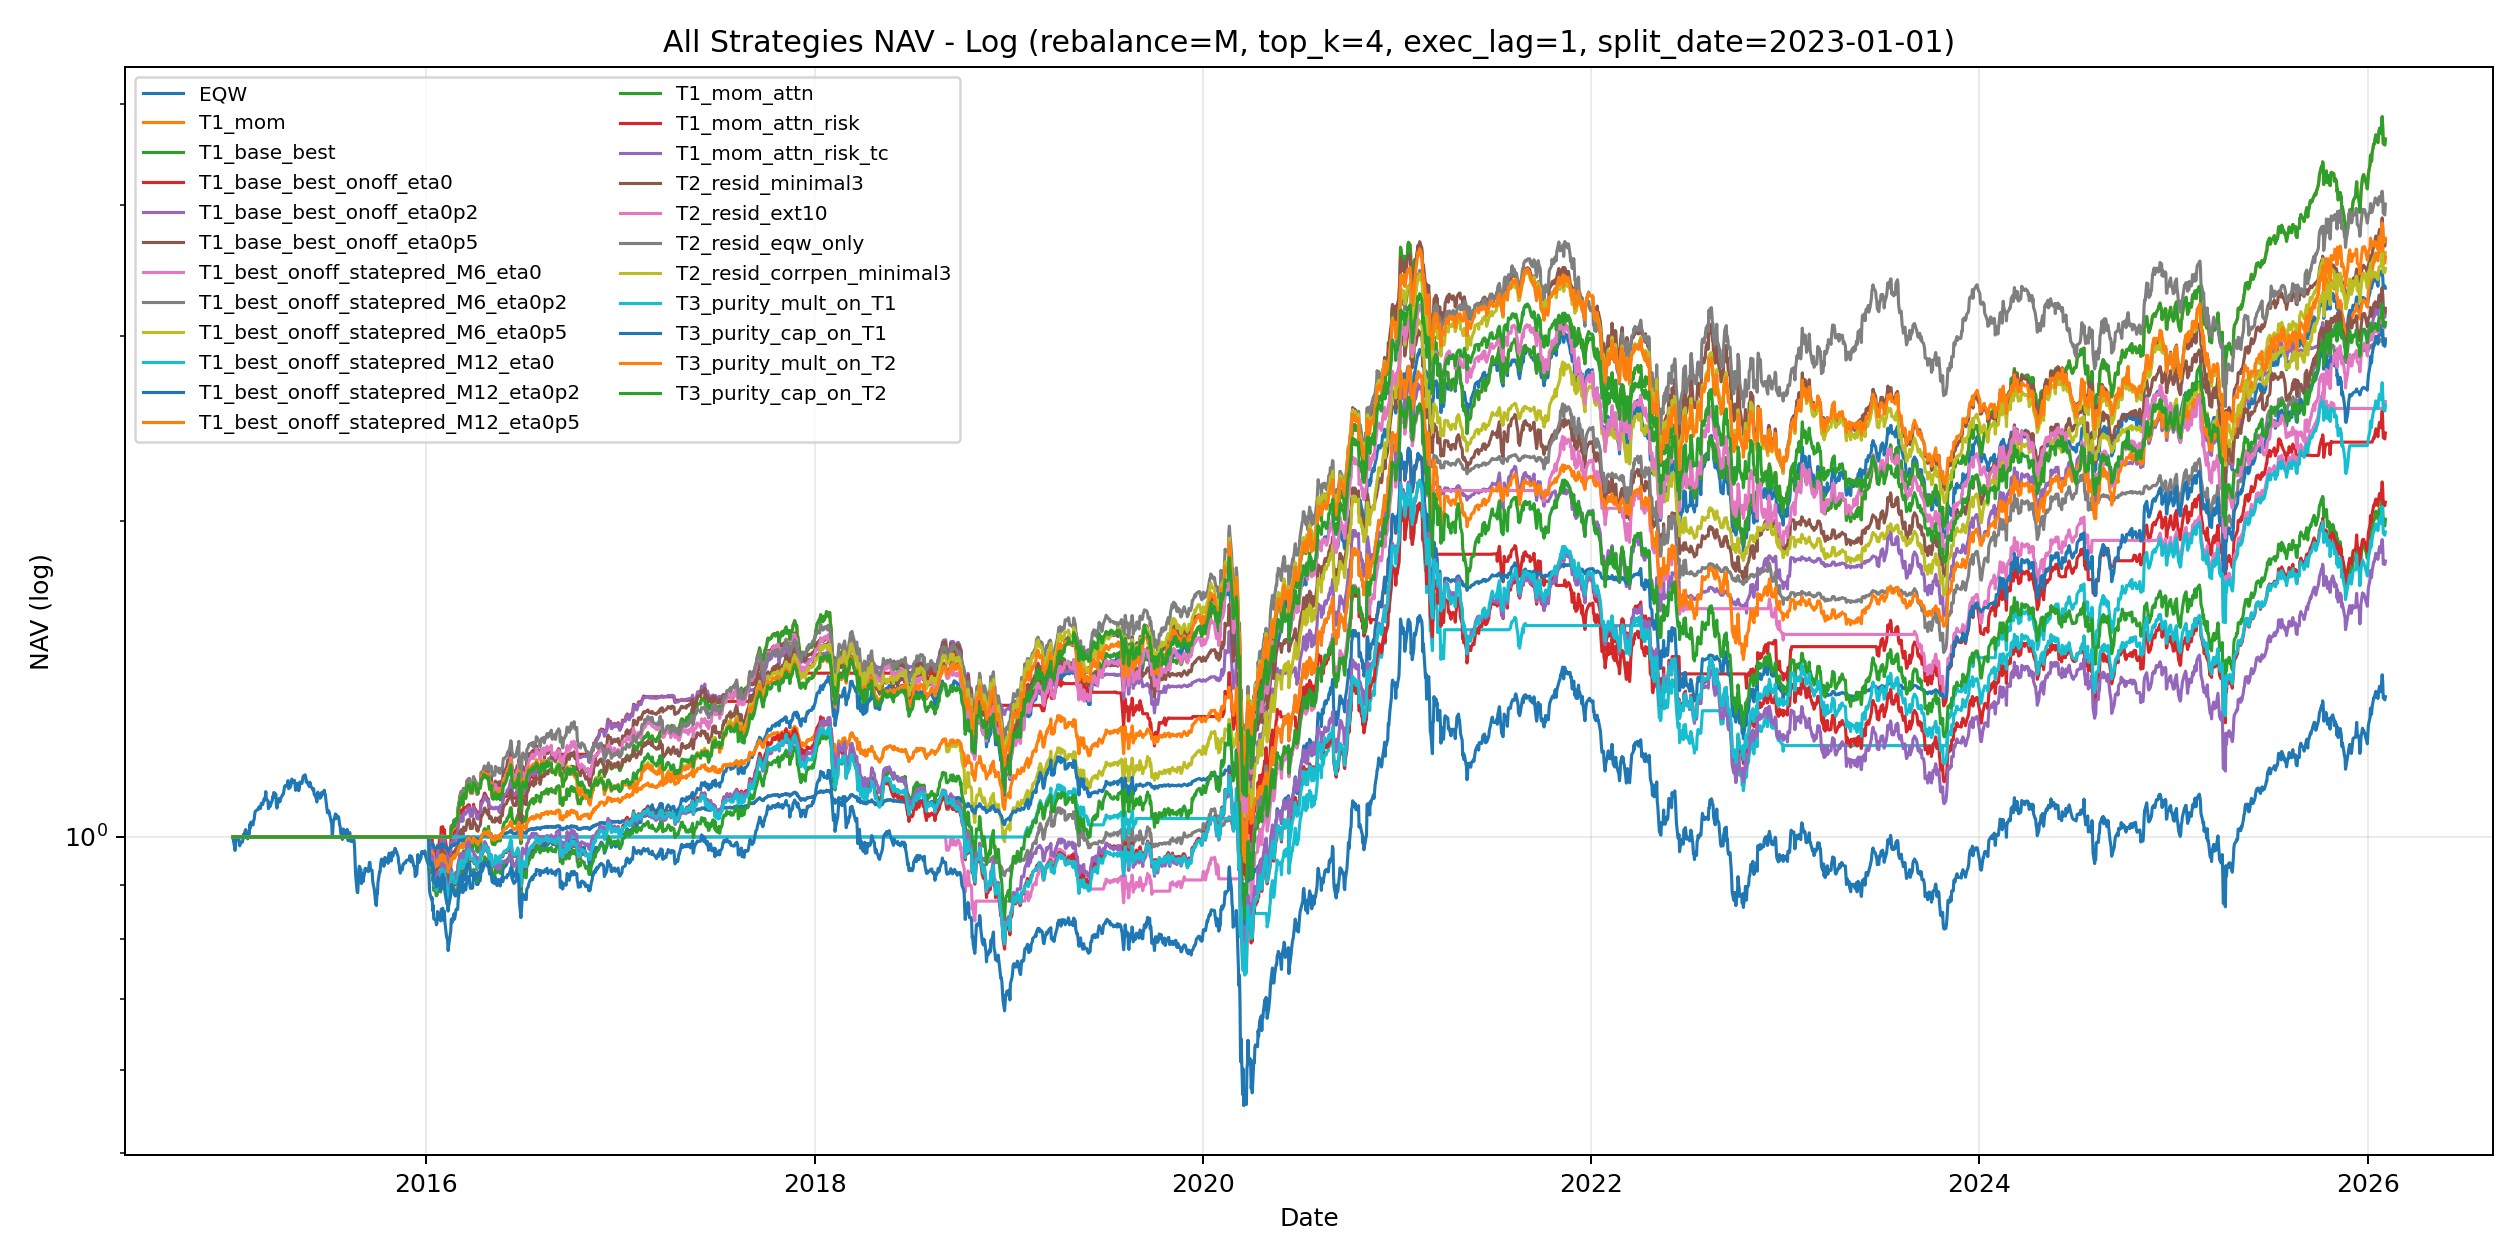

outputs/figures/drawdown_all_strategies_ALL.png


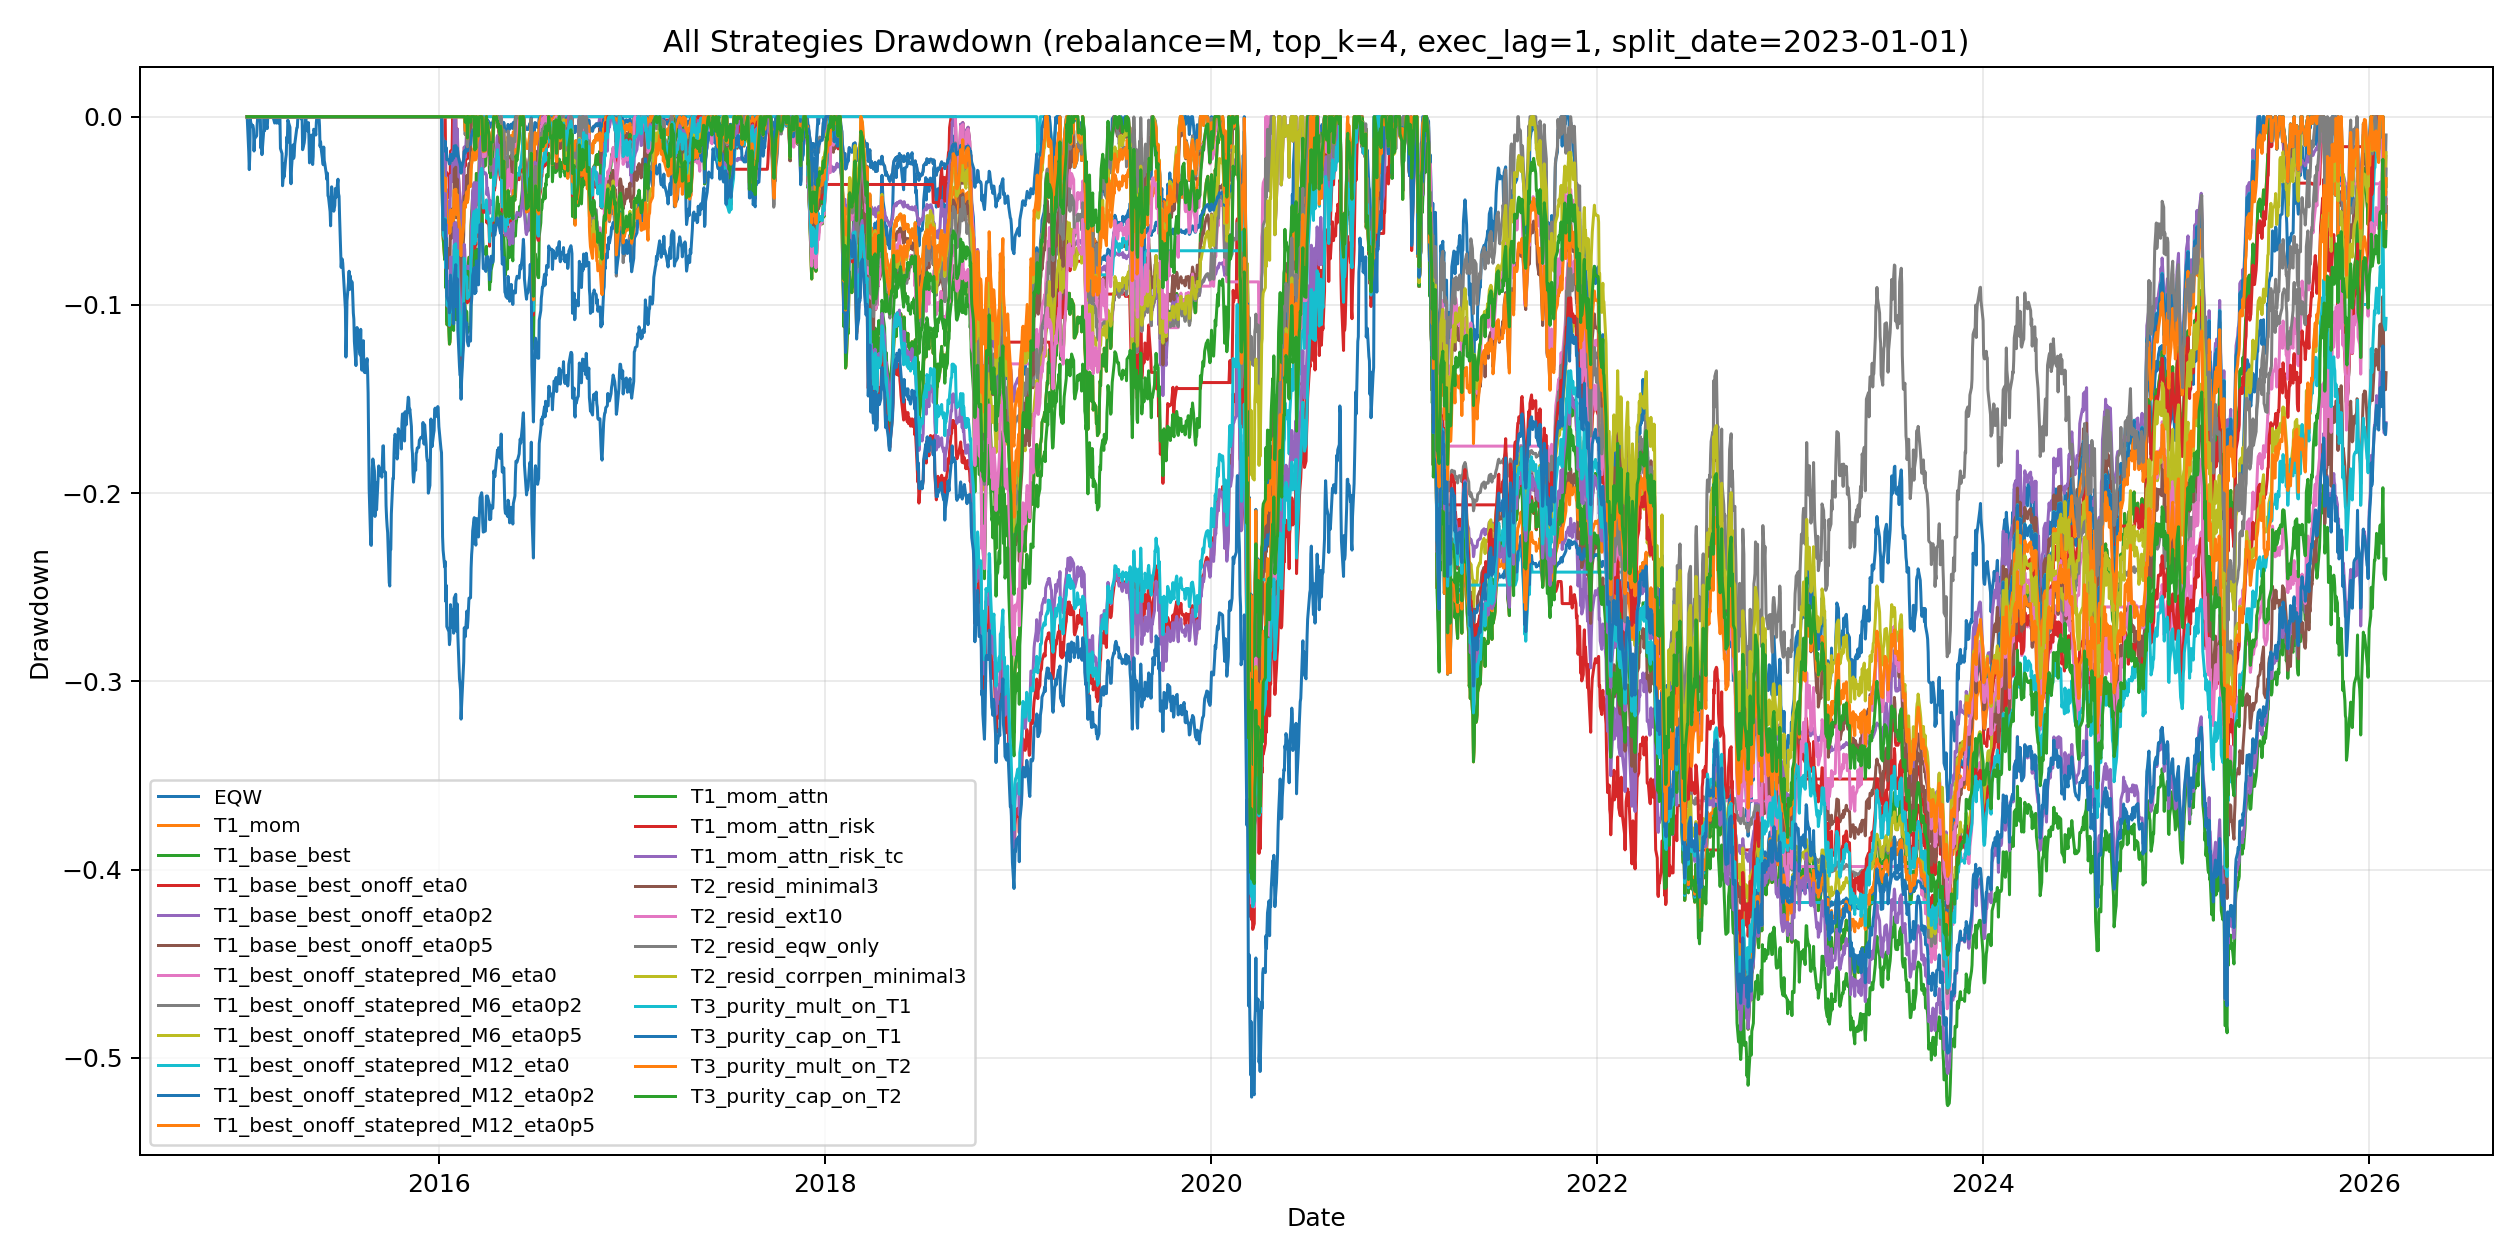

outputs/figures/rolling_beta_eqw.png


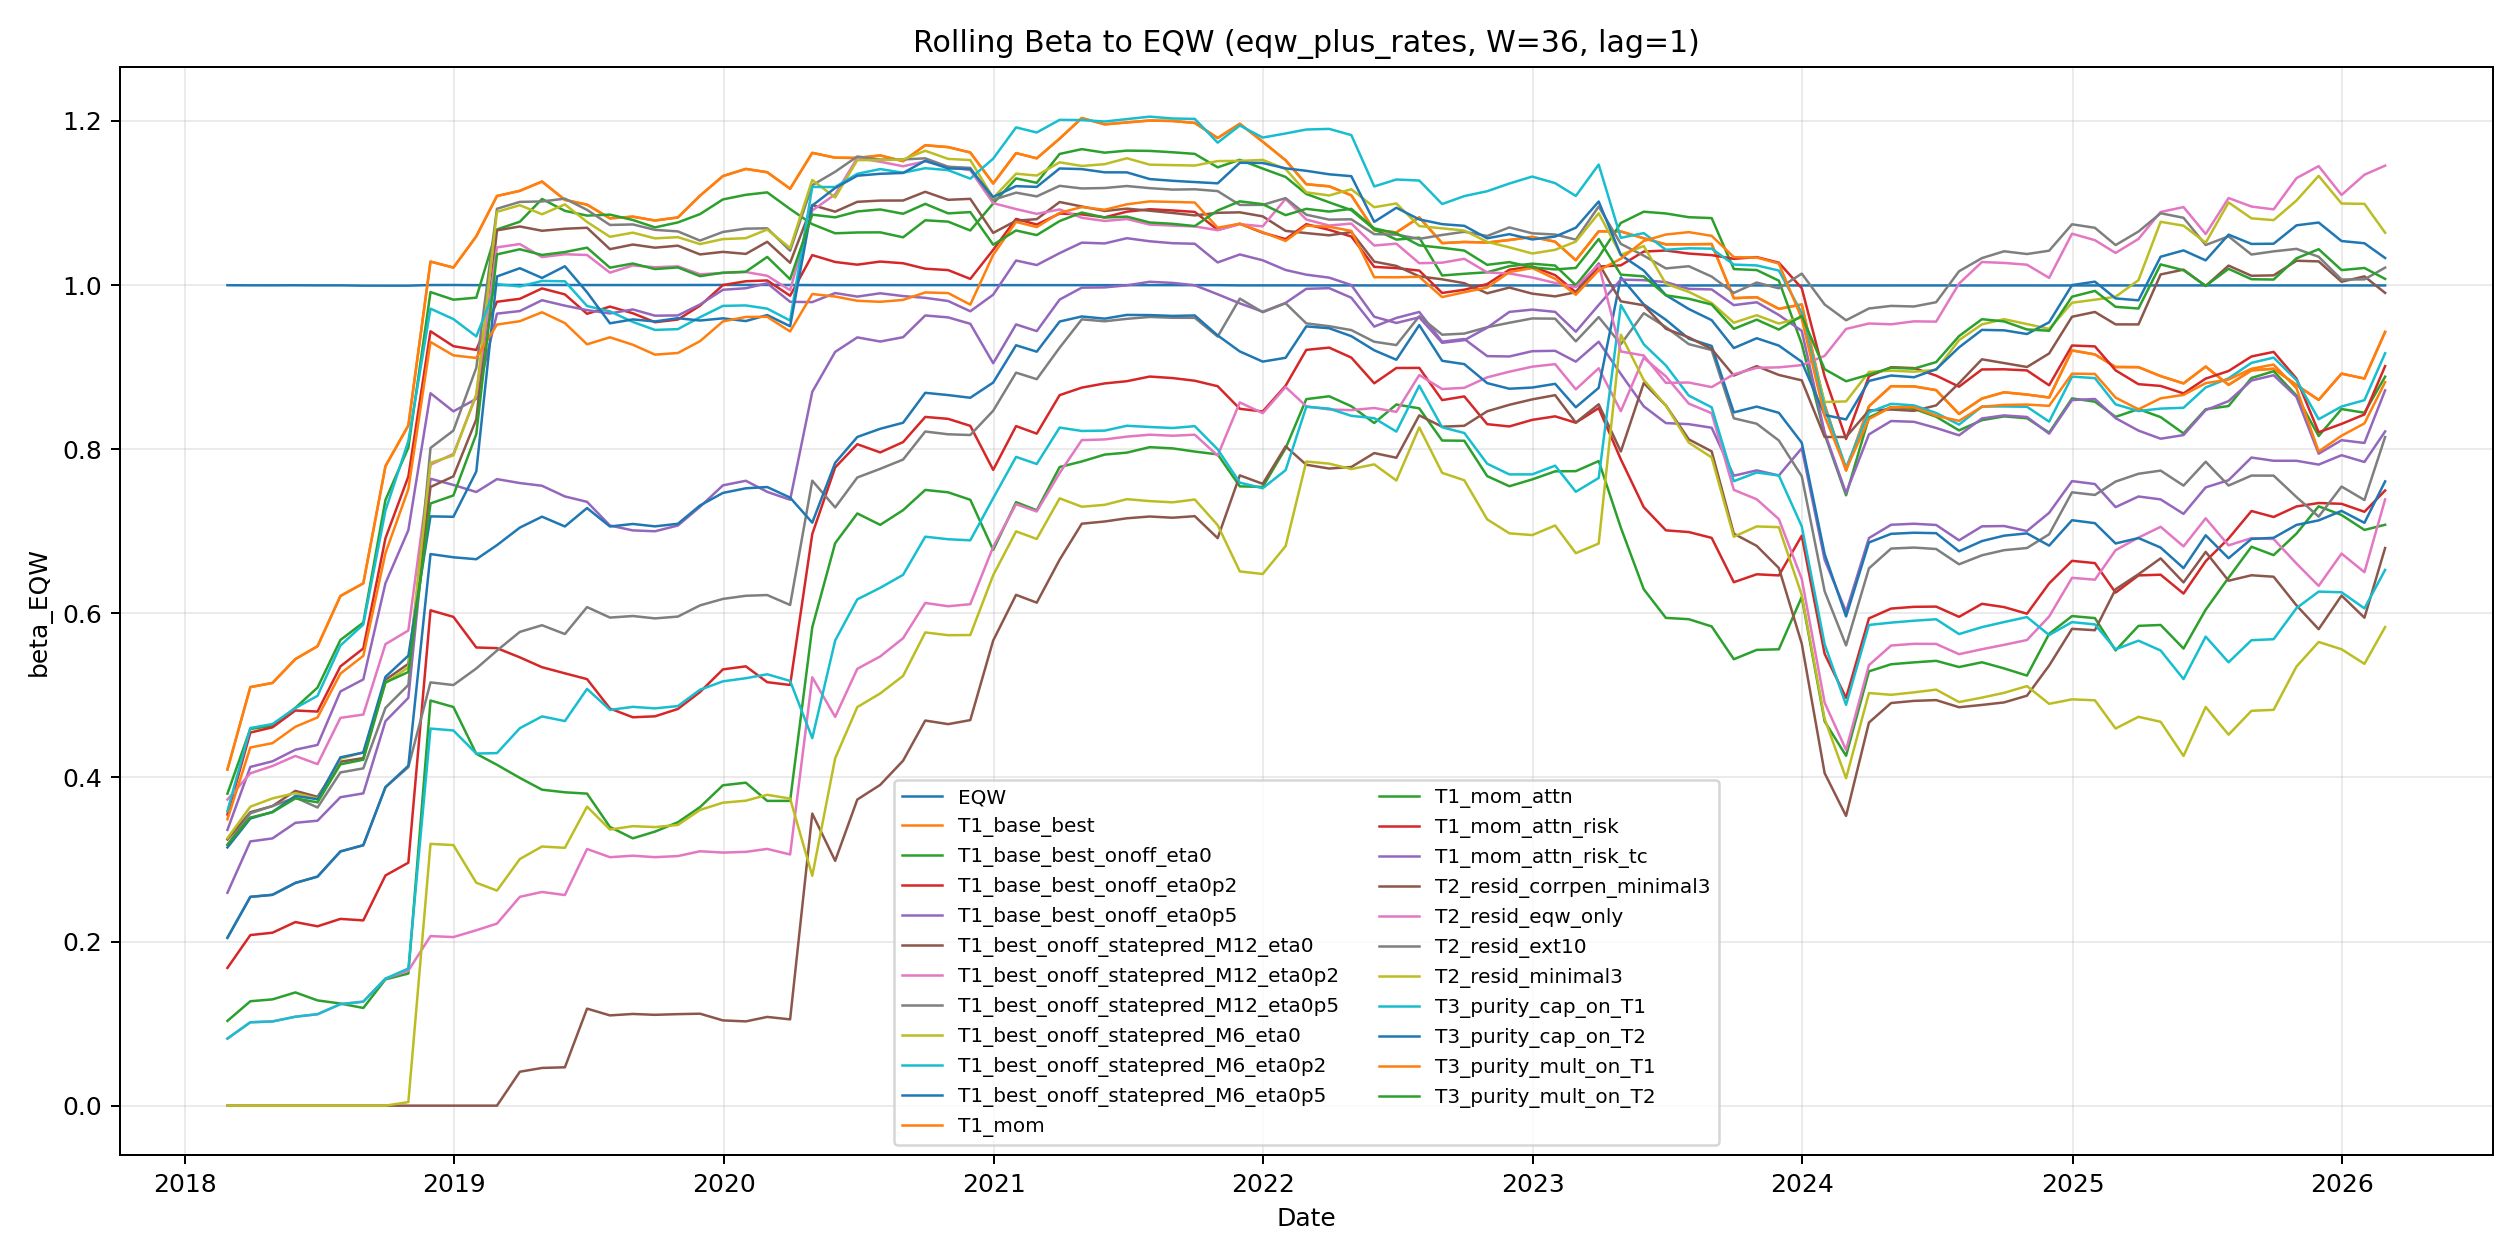

outputs/figures/factor_contrib_eqw_plus_rates.png


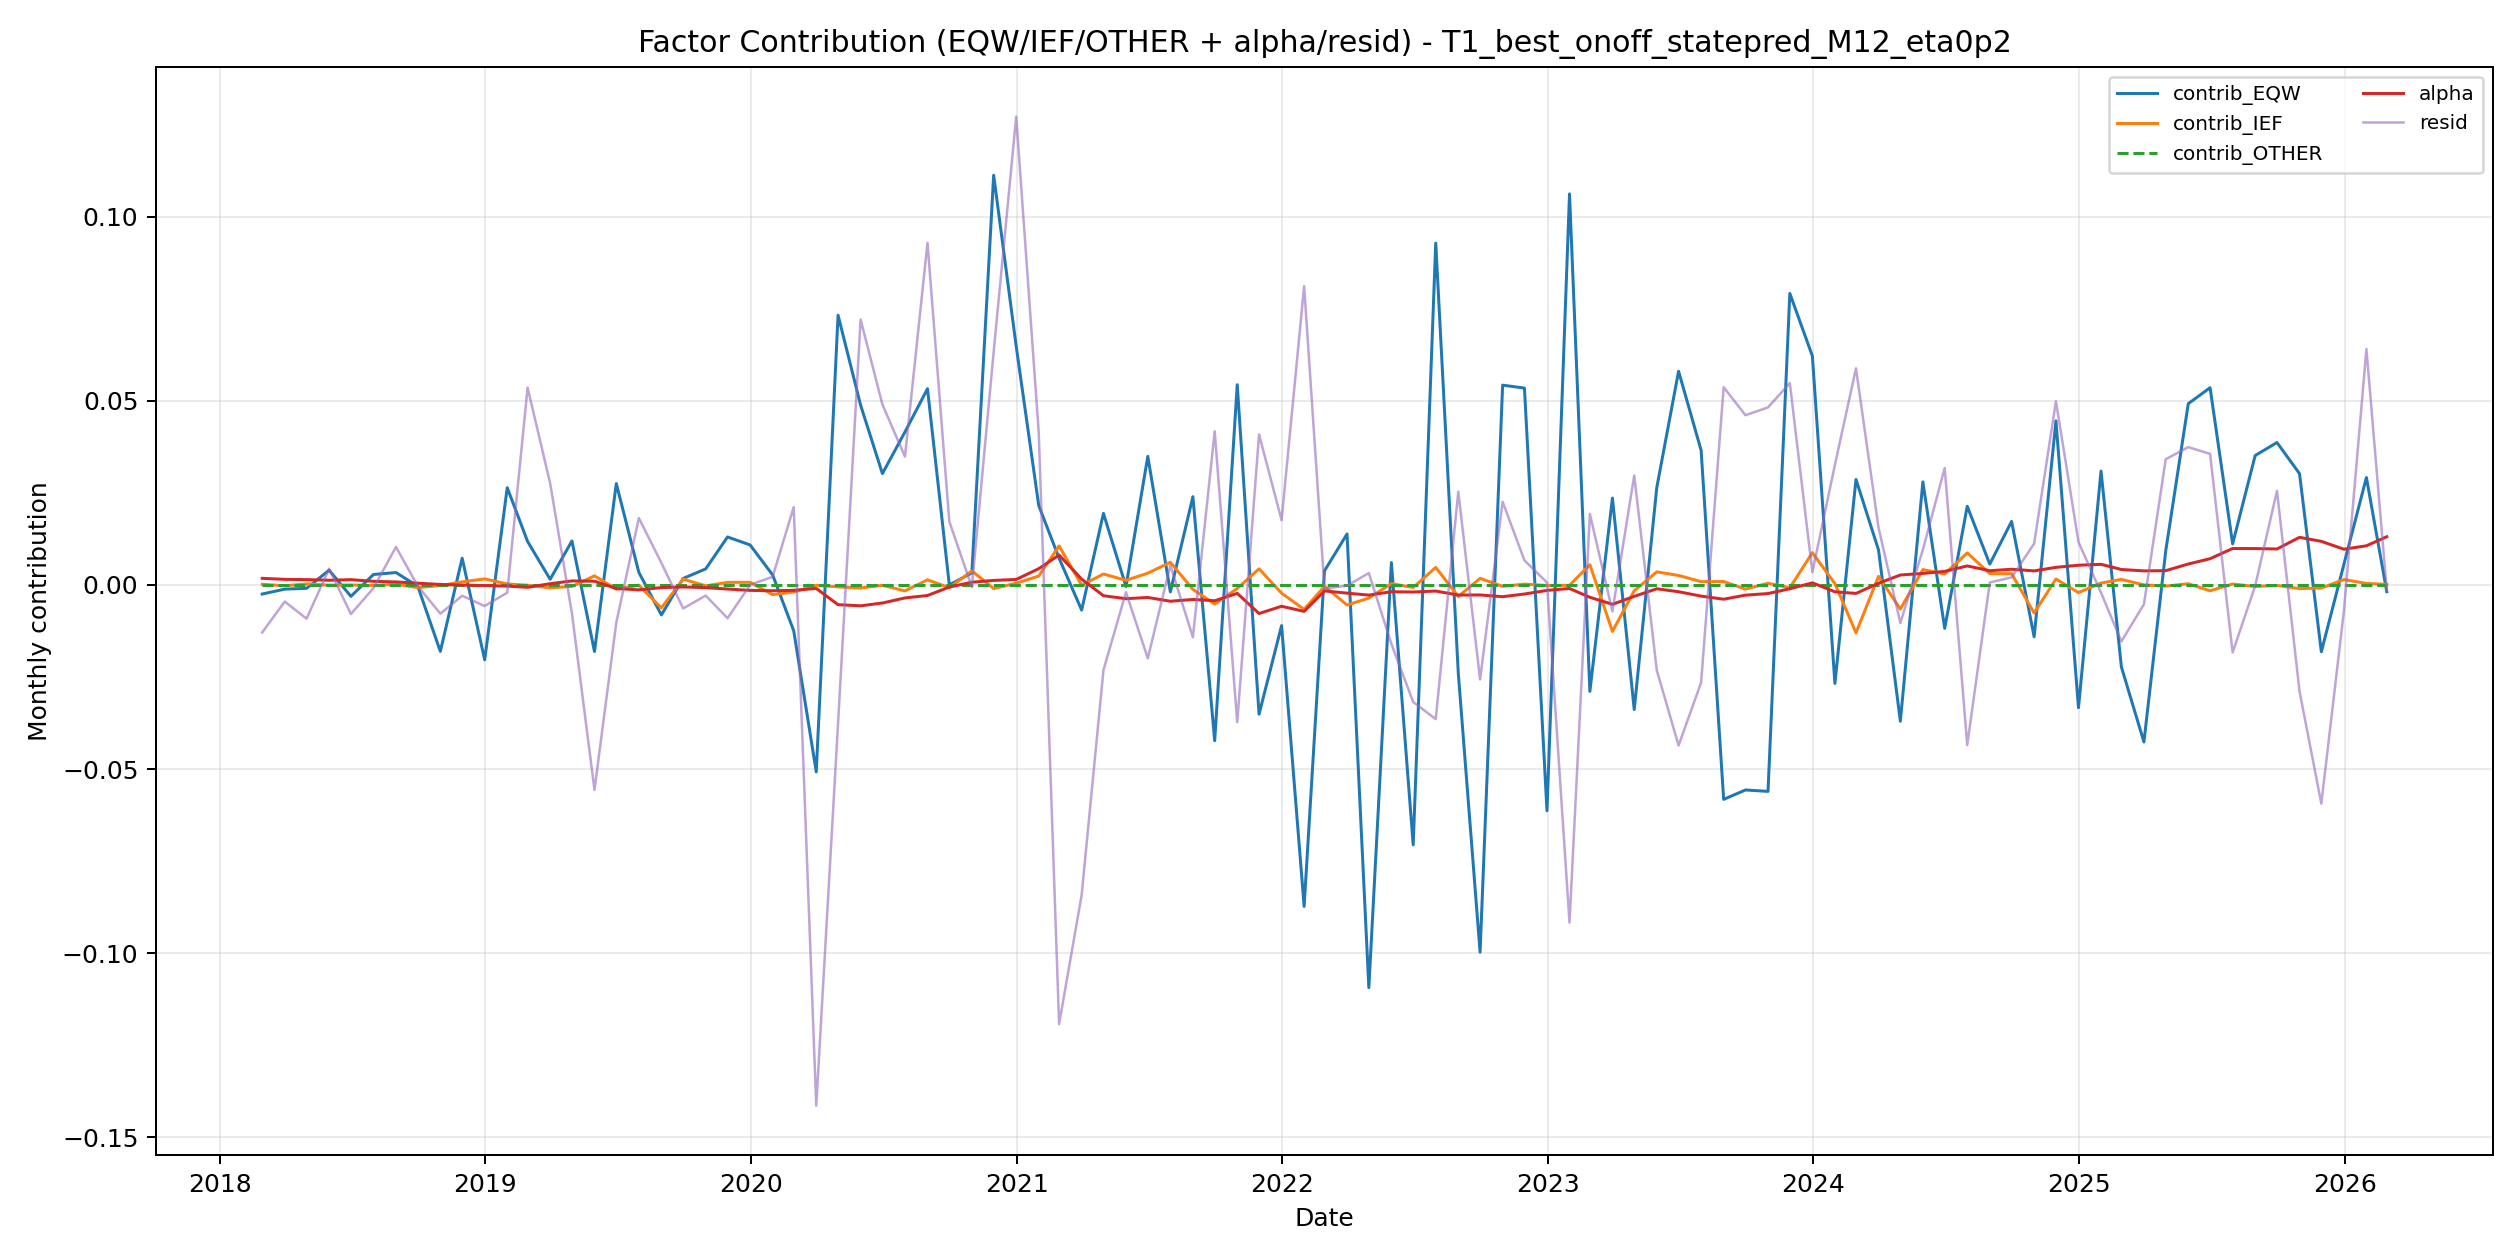

outputs/figures/attribution_internal_sel_wgt.png


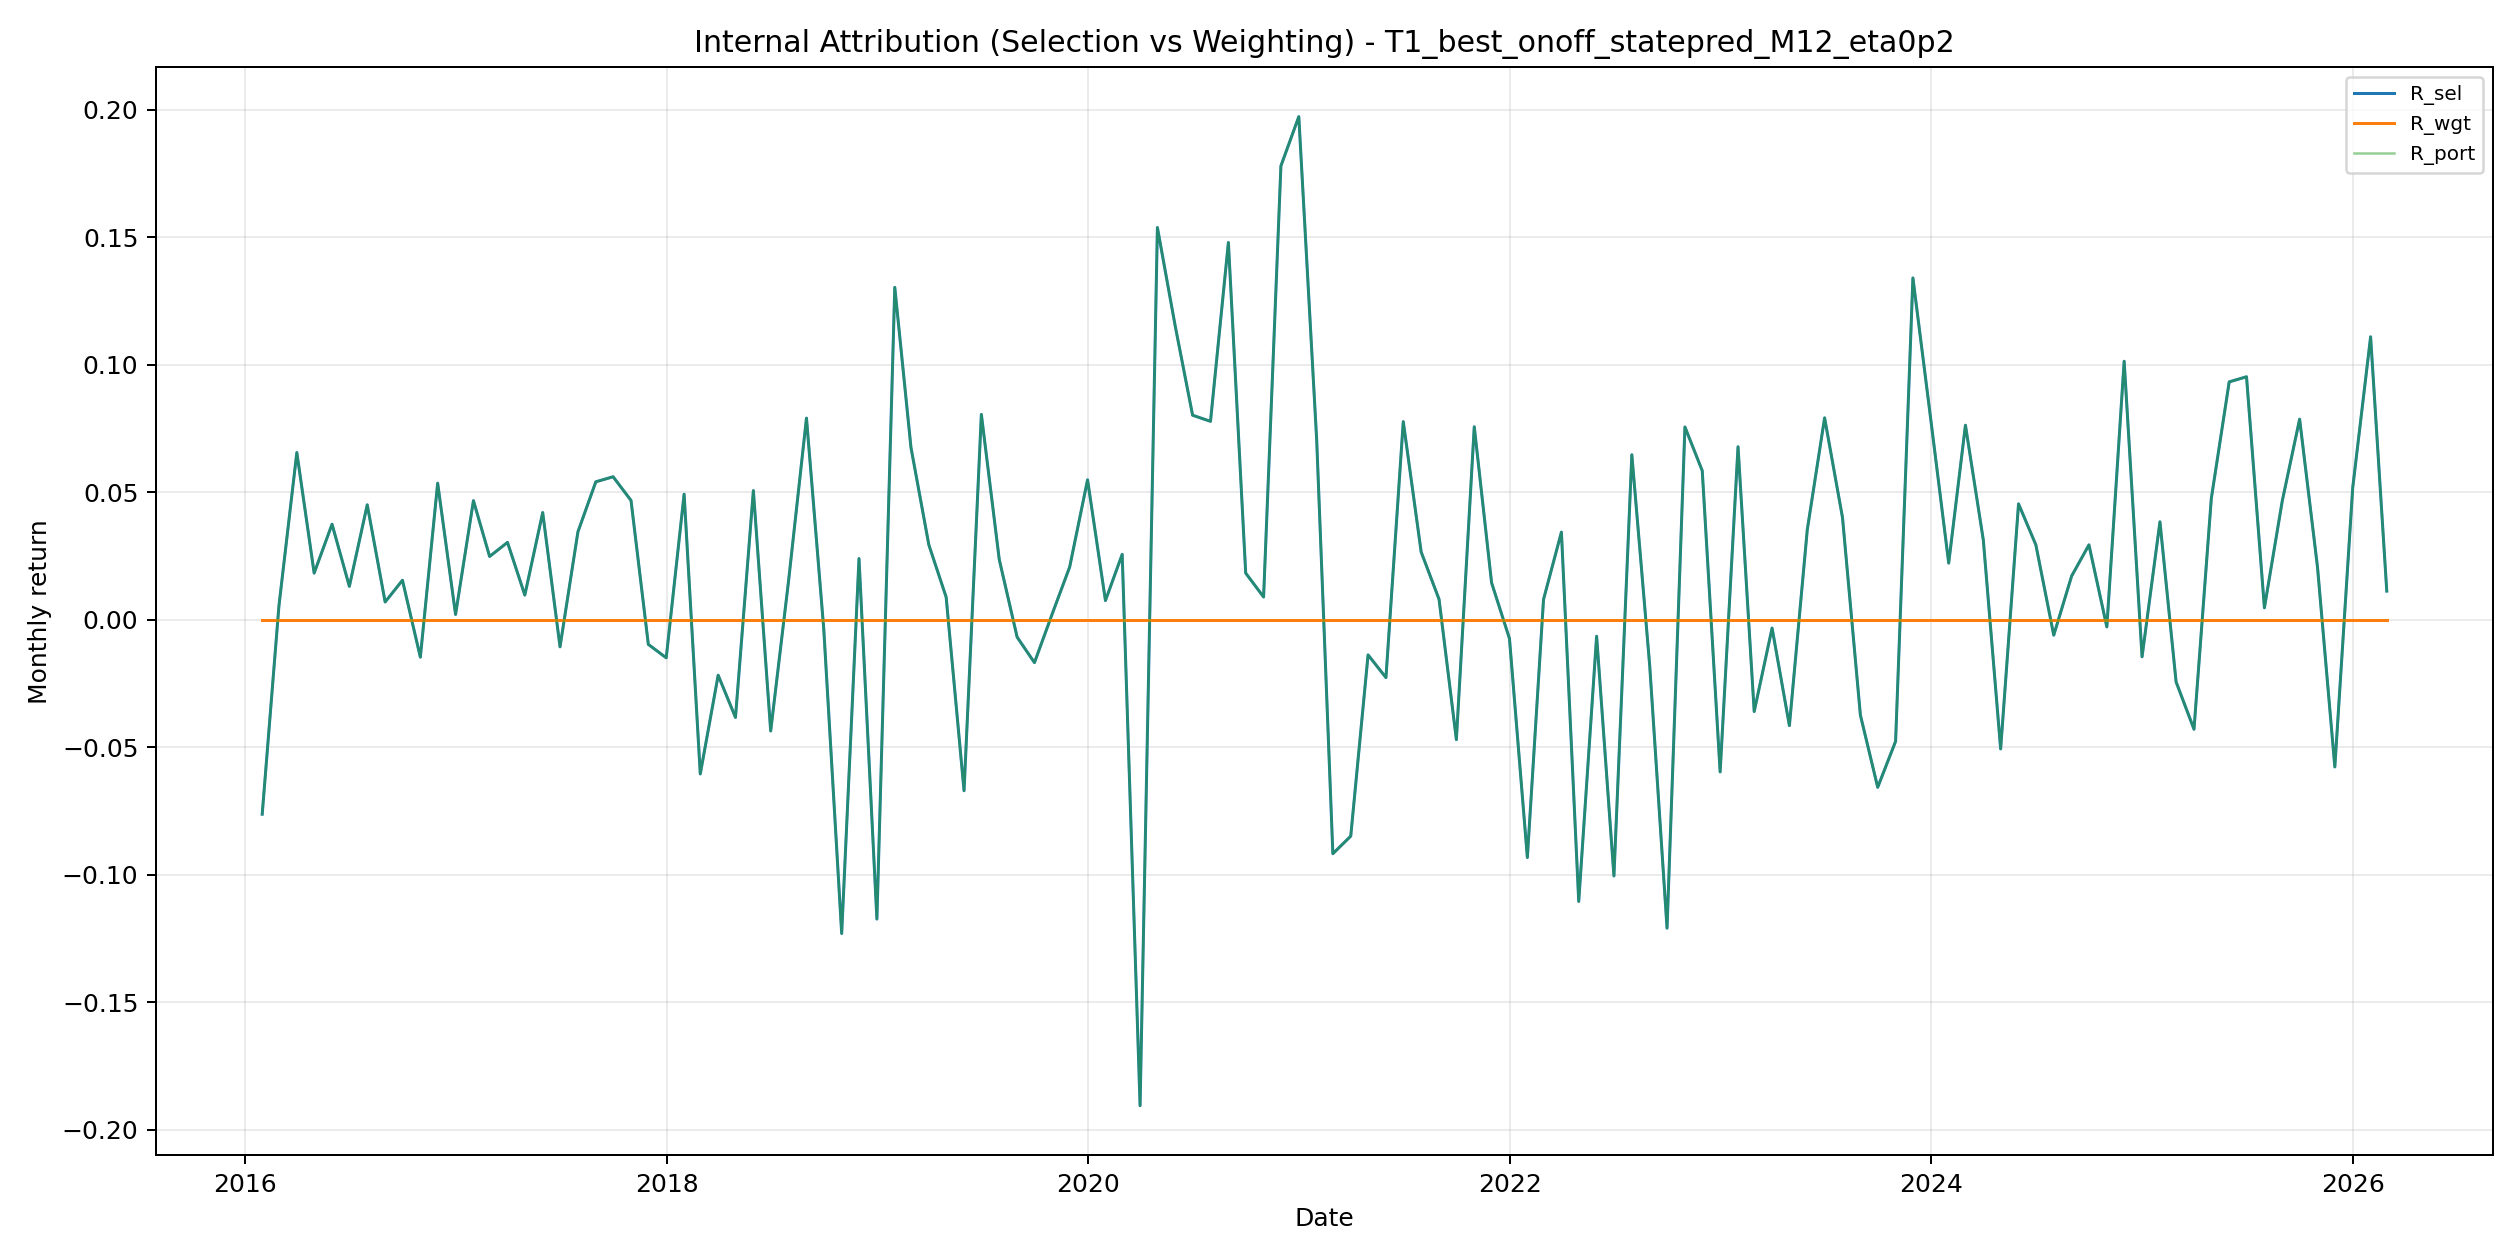

outputs/figures/overlay_excess_vs_indicator.png


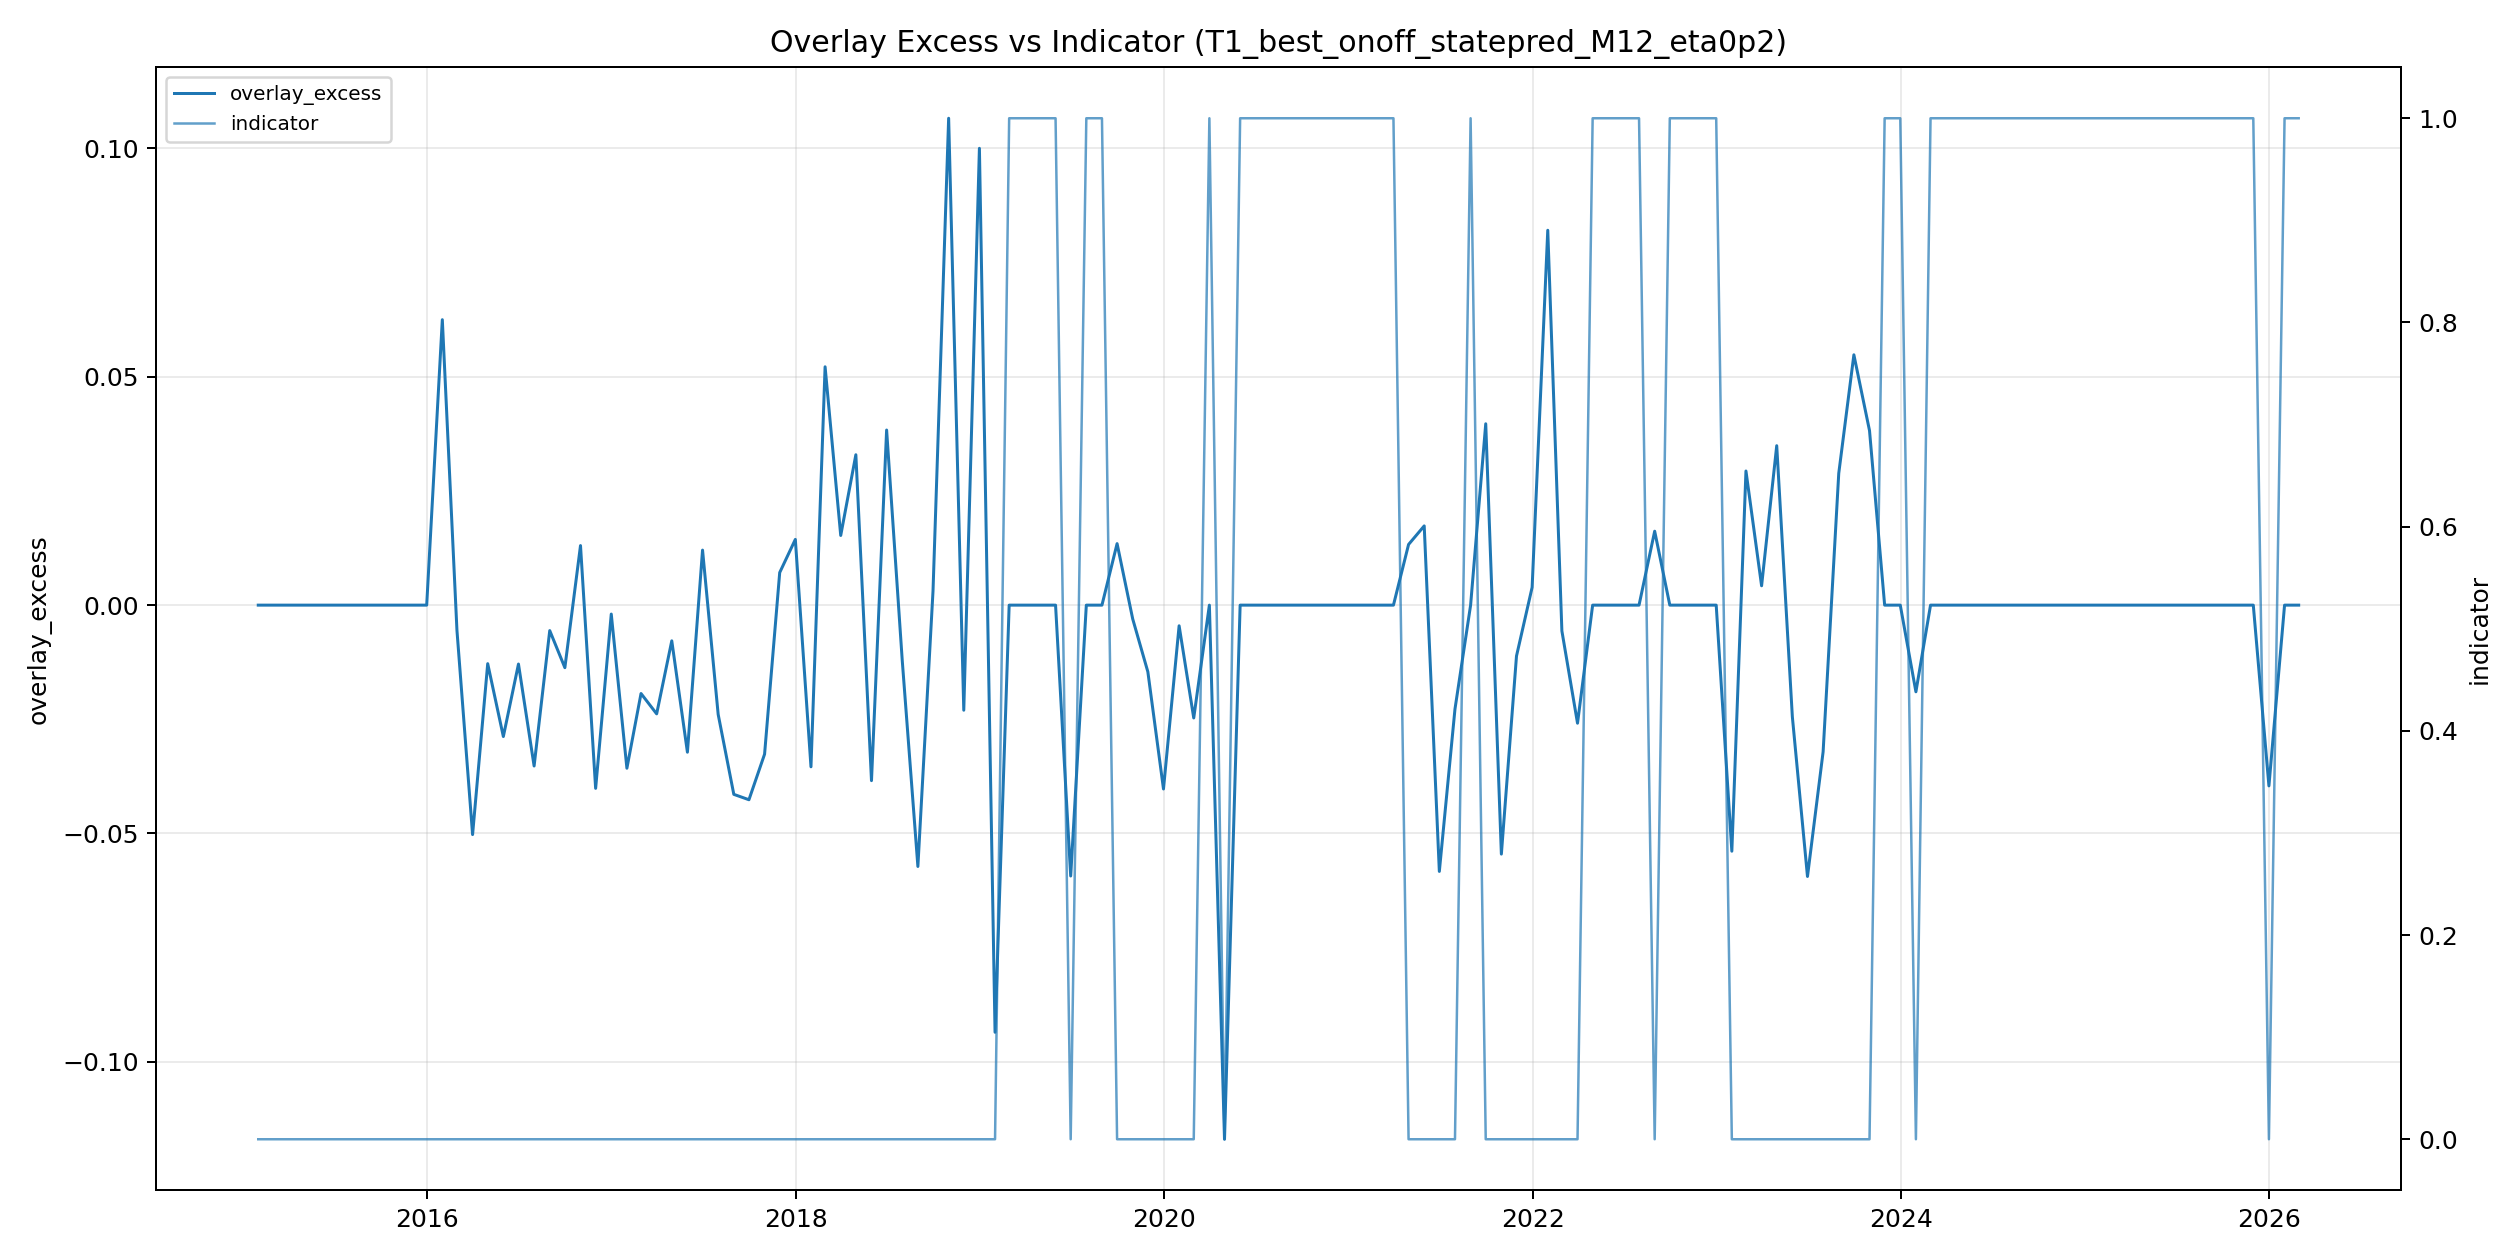

outputs/figures/dashboard_EQW.png


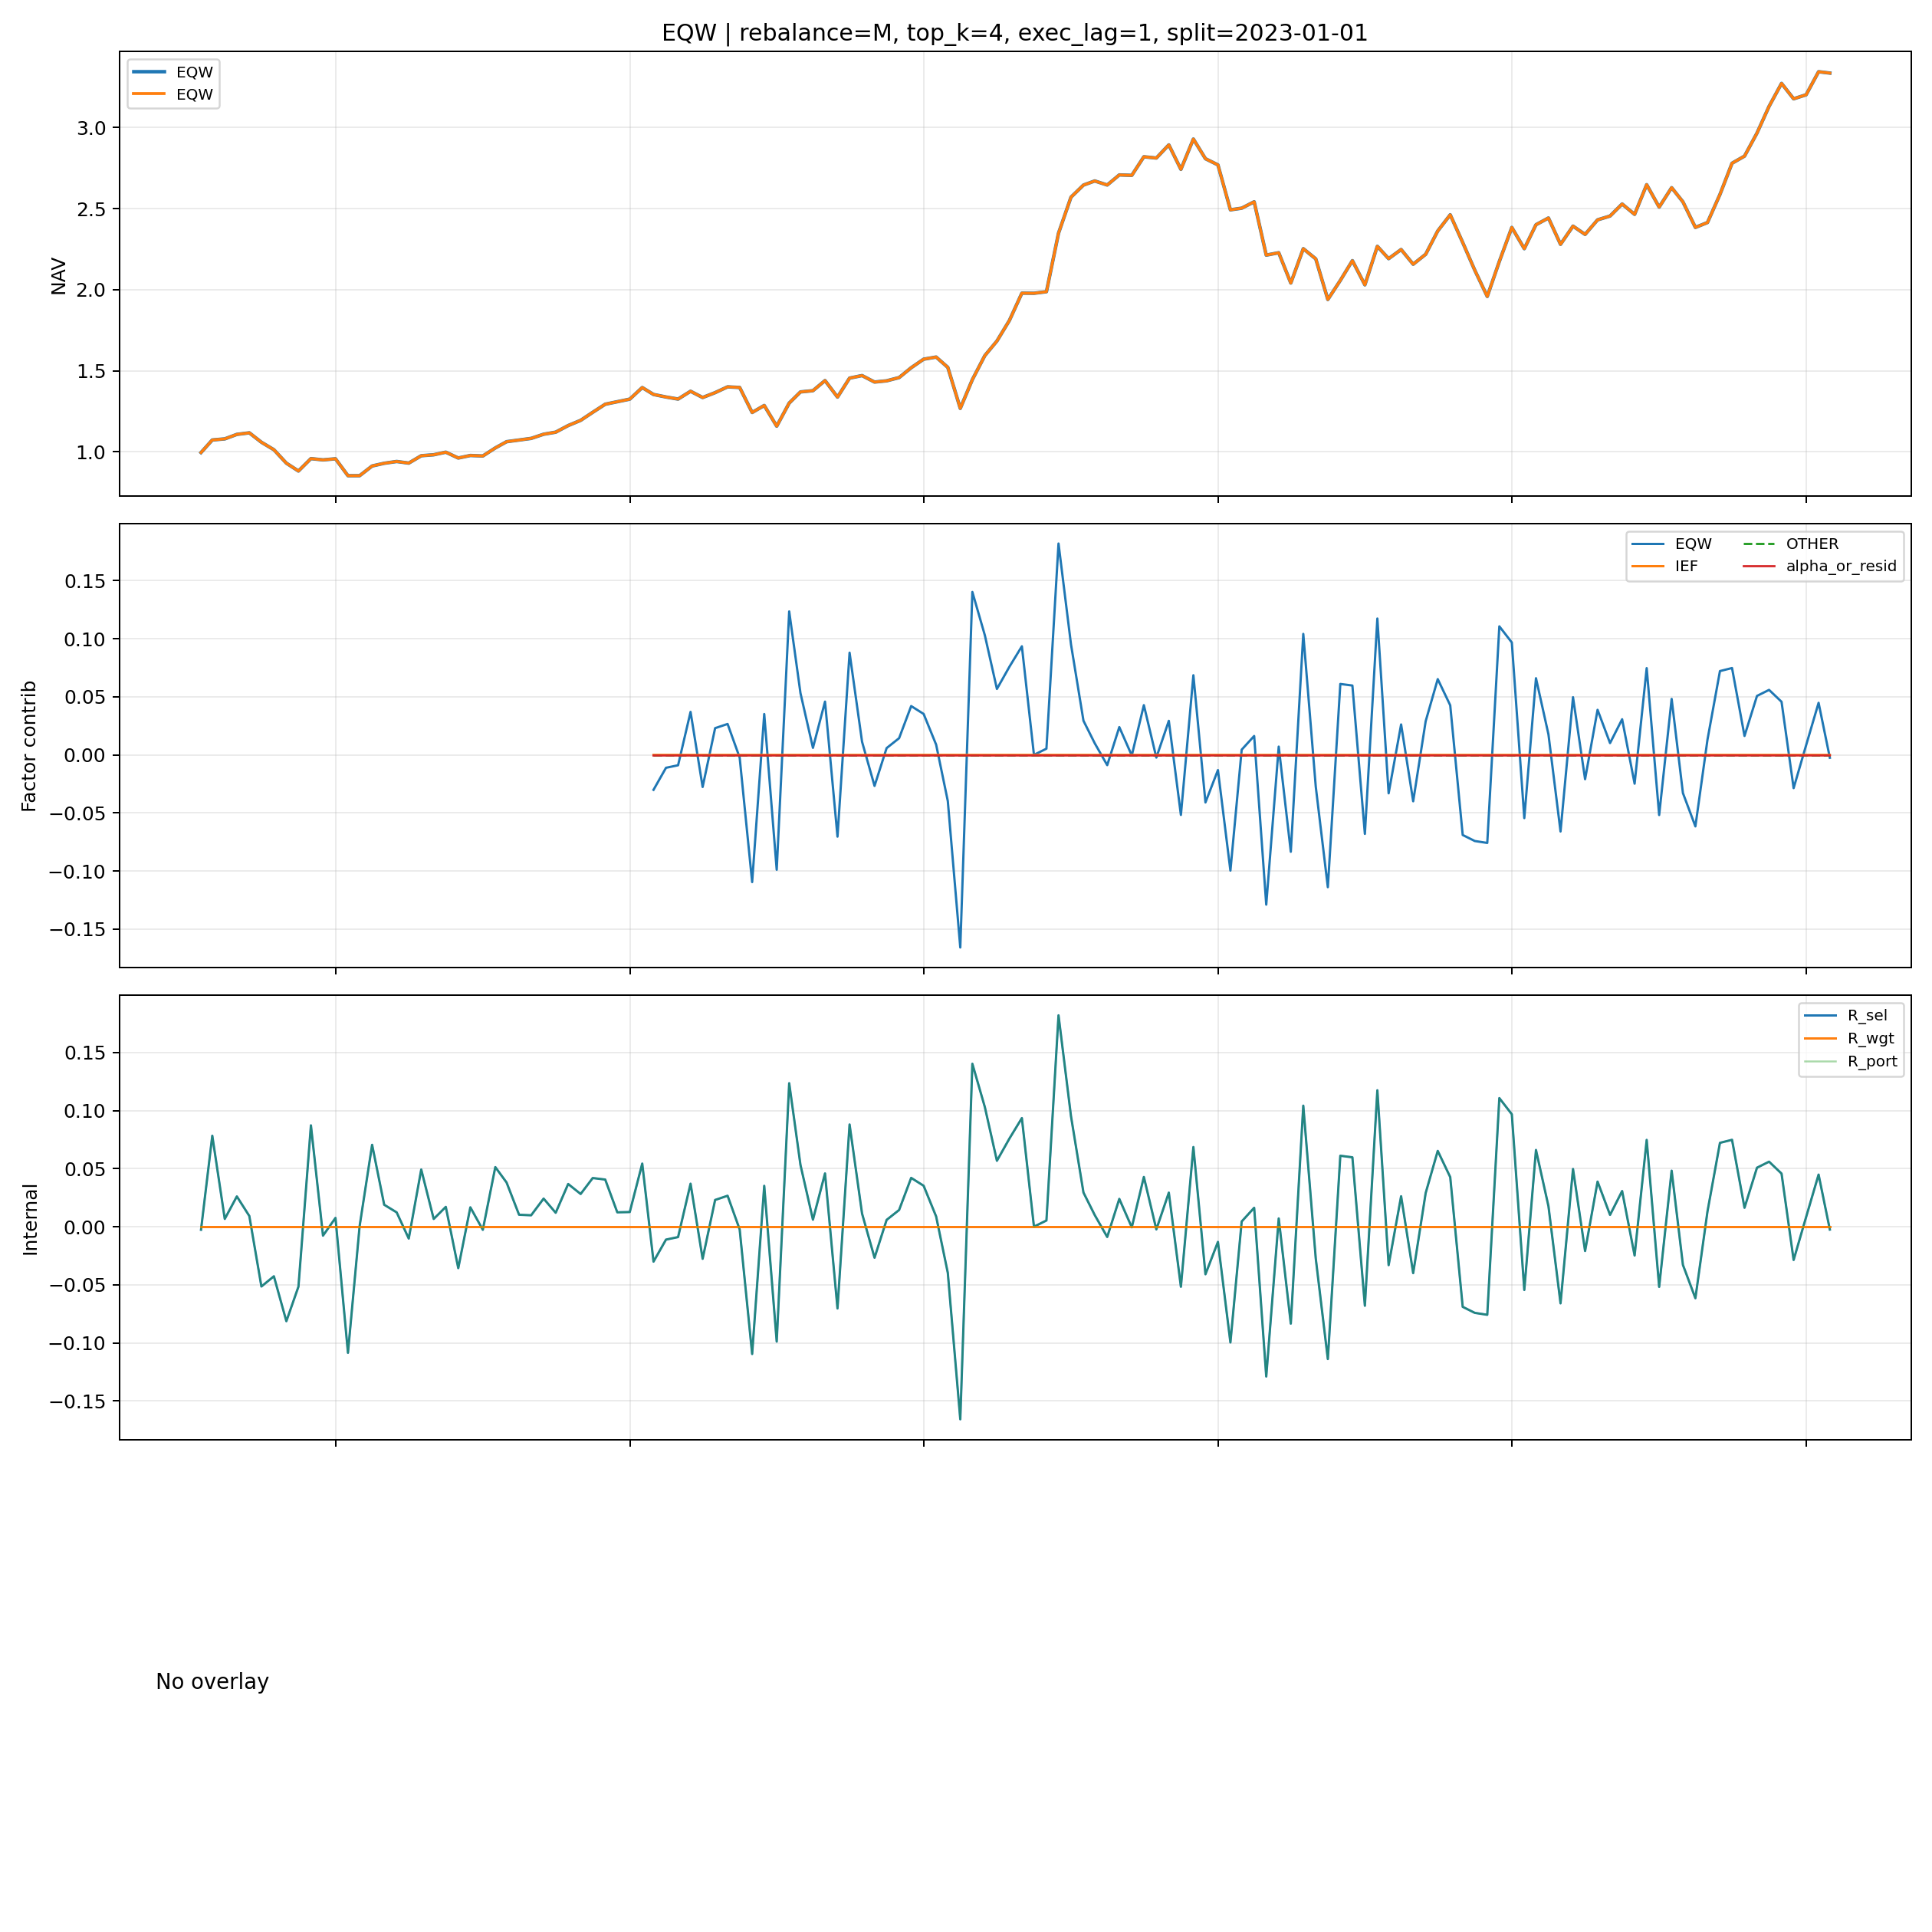

outputs/figures/dashboard_T1_base_best.png


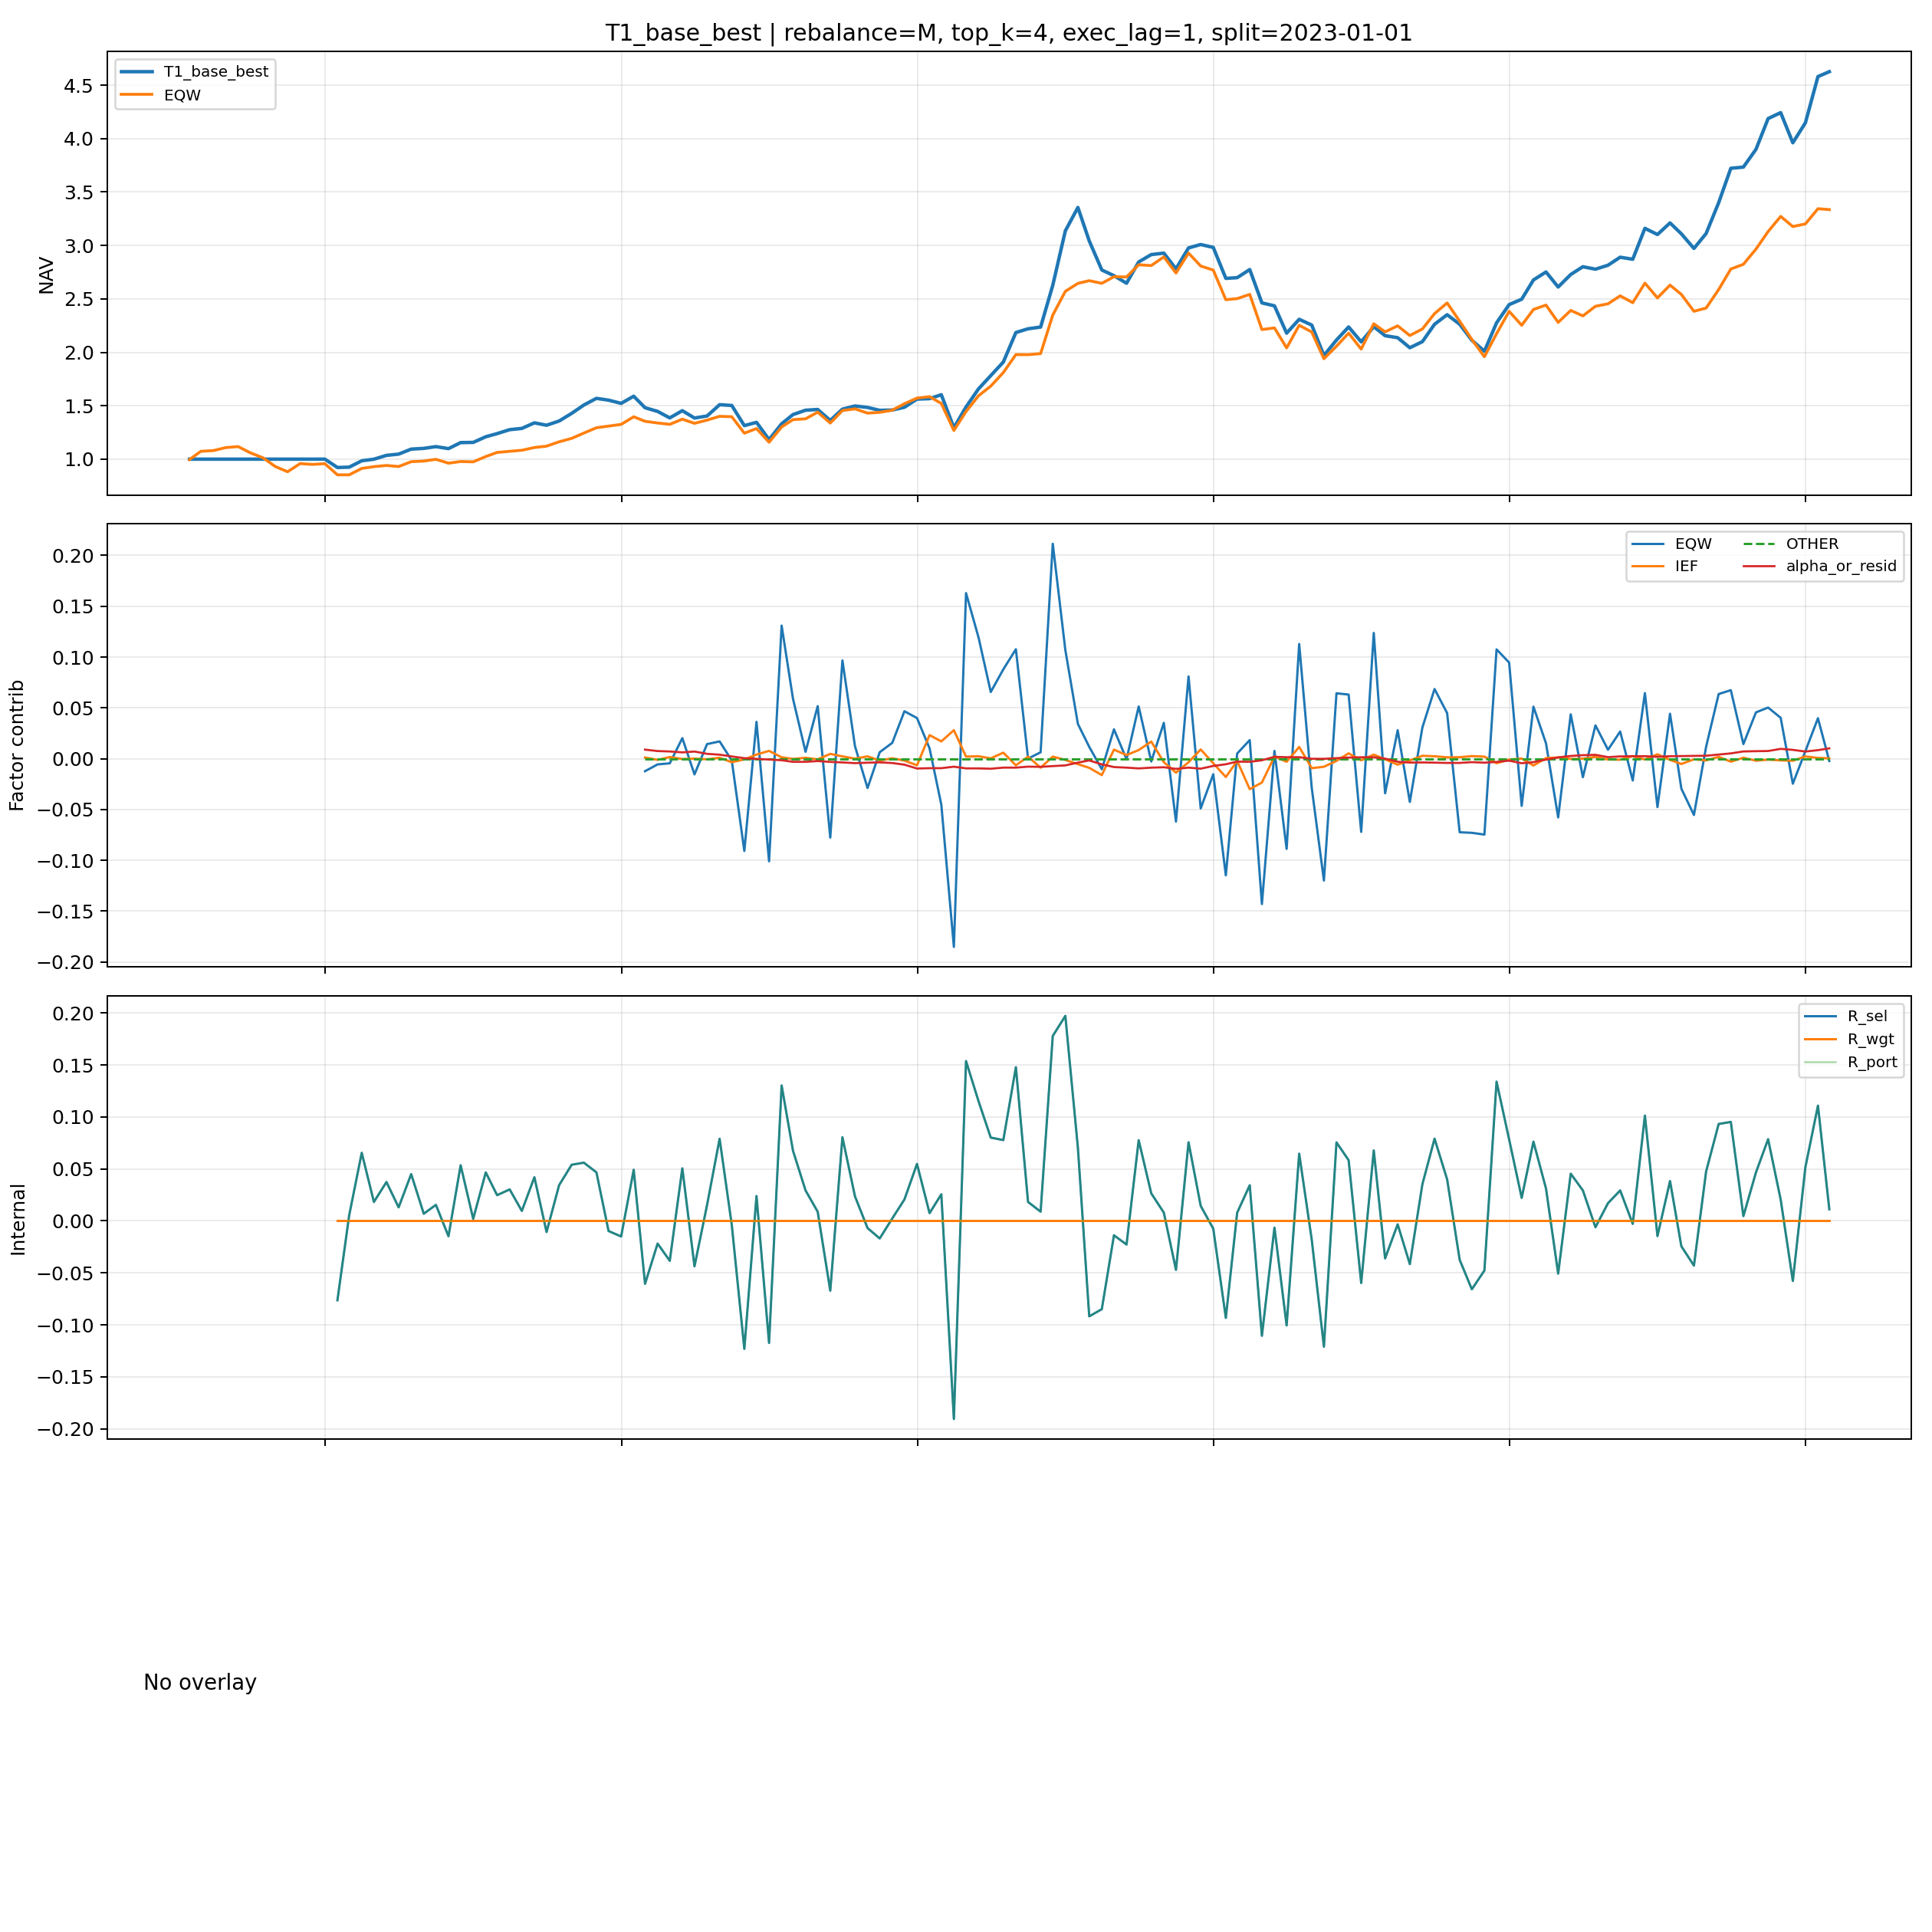

outputs/figures/dashboard_T1_best_onoff_statepred_M12_eta0p2.png


outputs/figures/dashboard_T2_resid_eqw_only.png


In [10]:
print("=== generated outputs (saved in outputs/) ===")
paths = result["output_paths"]
figure_paths = [
    paths["nav_linear_fig"],
    paths["nav_log_fig"],
    paths["drawdown_fig"],
    paths["attribution_beta_fig"],
    paths["attribution_contrib_fig"],
    paths["attribution_internal_fig"],
    paths["attribution_overlay_fig"],
] + list(paths["dashboard_paths"])

for p in figure_paths:
    print(p)
    if Image is not None and Path(p).exists():
        display(Image(filename=str(p)))


In [11]:
c = result["conclusion"]
best_sid = c["best_strategy_id"]

def _fmt(x):
    try:
        return f"{float(x):.4f}"
    except Exception:
        return str(x)

print("=== 最終結論 ===")
print("- Full Spec 推奨: T1_best_onoff_statepred_M12_eta0p2")
print(f"- 実測の最良 strategy_id(TestSharpe最大): {best_sid}")
print("- 最良strategy metrics (Train/Test/All):")
print("  Train:", c["best_train_metrics"])
print("  Test :", c["best_test_metrics"])
print("  All  :", c["best_all_metrics"])

beta_delta = c["beta_change_vs_t1base"]
alpha_delta = c["alpha_change_vs_t1base"]
beta_msg = "β低下寄与" if pd.notna(beta_delta) and beta_delta < 0 else "β低下は限定的"
alpha_msg = "α増加寄与" if pd.notna(alpha_delta) and alpha_delta > 0 else "α増加は限定的"
print(f"- 勝因1（β/α）: {beta_msg}, {alpha_msg} (Δβ={_fmt(beta_delta)}, Δα={_fmt(alpha_delta)})")
print(
    f"- 勝因2（寄与分解）: selection={_fmt(c['selection_sum_test'])}, "
    f"weighting={_fmt(c['weighting_sum_test'])}, overlay={_fmt(c['overlay_sum_test'])}"
)
turnover_delta = c["avg_turnover_best"] - c["avg_turnover_t1base"] if pd.notna(c["avg_turnover_t1base"]) else float('nan')
cost_delta = c["total_cost_best"] - c["total_cost_t1base"] if pd.notna(c["total_cost_t1base"]) else float('nan')
print(f"- 副作用（turnover/コスト）: Δturnover={_fmt(turnover_delta)}, Δtotal_cost={_fmt(cost_delta)}")


=== 最終結論 ===
- Full Spec 推奨: T1_best_onoff_statepred_M12_eta0p2
- 実測の最良 strategy_id(TestSharpe最大): T1_best_onoff_statepred_M12_eta0p2
- 最良strategy metrics (Train/Test/All):
  Train: {'strategy_id': 'T1_best_onoff_statepred_M12_eta0p2', 'period': 'Train', 'CAGR': 0.04017180289019695, 'Sharpe': 0.3058392800329971, 'Vol': 0.1859164103127675, 'MDD': -0.4714696587925926, 'AvgTurnover': 0.08714001986097318, 'TotalTradingCost': 0.09273000000000002, 'TotalExpenseCost': 0.018887896825396825, 'FinalNAV': 1.3699504486391243, 'onoff_enabled': True, 'onoff_method': 'state_pred', 'onoff_eta': 0.2, 'onoff_M': 12.0}
  Test : {'strategy_id': 'T1_best_onoff_statepred_M12_eta0p2', 'period': 'Test', 'CAGR': 0.4259293461181566, 'Sharpe': 1.4703264888716827, 'Vol': 0.18308002684310593, 'MDD': -0.19773022605442814, 'AvgTurnover': 0.10142118863049096, 'TotalTradingCost': 0.06919, 'TotalExpenseCost': 0.012522976190476192, 'FinalNAV': 2.9737264903082004, 'onoff_enabled': True, 'onoff_method': 'state_pred', 'ono